<a href="https://colab.research.google.com/github/wcliao1962/2025_DL/blob/master/Keras_Mnist_MLP_h256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 資料預處理

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.18.0'

In [3]:
# from keras.utils import np_utils   # tf 1.x
from tensorflow.keras import utils   # tf 2.0
import numpy as np
np.random.seed(10)

In [4]:
from tensorflow.keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [5]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [6]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [7]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

# 建立模型

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [12]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None


# 訓練模型
* 損失函數使用**crosse ntropy**
* 優化器(optimizer)使用**adam**，較**SGD(梯度下降)**快速收斂損失誤差


In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


## **驗證(validation)**用資料
* 從訓練資料當中切出20%作為**驗證(validation)**用資料
* 全部訓練資料60000筆資料(手寫數字圖片)當中，12000筆當作驗證資料，故真正訓練資料只剩48000筆。

## **批次大小(batch_size)**
* 每一訓練回合(epoch)，設定每一**批次**輸入200筆資料(手寫數字圖片)，所以，每一epoch，有48000/200=240批次。
* 每一**批次**輸入200筆資料(手寫數字圖片)，所以：神經網路輸入資料的形狀為(200, 784)
* 第一隱藏層輸出資料的形狀為(200, 256)，輸出層輸出資料的形狀為(200, 10)。

In [14]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2,
                         epochs=10, batch_size=200,verbose=2)

Epoch 1/10
240/240 - 4s - 17ms/step - accuracy: 0.8859 - loss: 0.4371 - val_accuracy: 0.9363 - val_loss: 0.2282
Epoch 2/10
240/240 - 2s - 9ms/step - accuracy: 0.9456 - loss: 0.1927 - val_accuracy: 0.9542 - val_loss: 0.1640
Epoch 3/10
240/240 - 3s - 10ms/step - accuracy: 0.9618 - loss: 0.1358 - val_accuracy: 0.9614 - val_loss: 0.1302
Epoch 4/10
240/240 - 3s - 12ms/step - accuracy: 0.9709 - loss: 0.1028 - val_accuracy: 0.9668 - val_loss: 0.1125
Epoch 5/10
240/240 - 3s - 13ms/step - accuracy: 0.9769 - loss: 0.0815 - val_accuracy: 0.9714 - val_loss: 0.0978
Epoch 6/10
240/240 - 2s - 8ms/step - accuracy: 0.9816 - loss: 0.0660 - val_accuracy: 0.9728 - val_loss: 0.0889
Epoch 7/10
240/240 - 3s - 10ms/step - accuracy: 0.9850 - loss: 0.0543 - val_accuracy: 0.9747 - val_loss: 0.0878
Epoch 8/10
240/240 - 2s - 10ms/step - accuracy: 0.9874 - loss: 0.0458 - val_accuracy: 0.9761 - val_loss: 0.0834
Epoch 9/10
240/240 - 2s - 8ms/step - accuracy: 0.9900 - loss: 0.0380 - val_accuracy: 0.9767 - val_loss: 0.

### 準確率(accuracy)與損失(loss)
* 每一epoch的每一批次訓練後，都會計算神經網路的訓練後的損失(誤差)與準確率，並進行神經網路的參數調整，以降低損失(誤差)：
  - 利用梯度下降法計算神經網路參數的調整量
  - 利用倒傳遞方式進行參數大小調整
* 每一epoch訓練後，計算神經網路所有批次的平均準確率(accuracy)與平均損失(loss)，如上。
* 每一epoch訓練後，用驗證資料驗證神經網路的準確率(val_accuracy)與損失(val_loss)，如上。

# 以圖形顯示訓練過程

In [15]:
train_history.history

{'accuracy': [0.885895848274231,
  0.945604145526886,
  0.9618124961853027,
  0.9709374904632568,
  0.976937472820282,
  0.9816250205039978,
  0.9850000143051147,
  0.987375020980835,
  0.9900416731834412,
  0.991937518119812],
 'loss': [0.43708011507987976,
  0.1927124410867691,
  0.13580329716205597,
  0.10284106433391571,
  0.0815354585647583,
  0.06595806032419205,
  0.054264456033706665,
  0.04582595452666283,
  0.038043998181819916,
  0.031255319714546204],
 'val_accuracy': [0.9363333582878113,
  0.9542499780654907,
  0.9614166617393494,
  0.9668333530426025,
  0.9714166522026062,
  0.9728333353996277,
  0.9746666550636292,
  0.9760833382606506,
  0.9766666889190674,
  0.9771666526794434],
 'val_loss': [0.22816278040409088,
  0.16396647691726685,
  0.1302209496498108,
  0.1125420555472374,
  0.09782335162162781,
  0.08887982368469238,
  0.08781322091817856,
  0.08342535048723221,
  0.08017441630363464,
  0.08041980862617493]}

In [16]:
import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

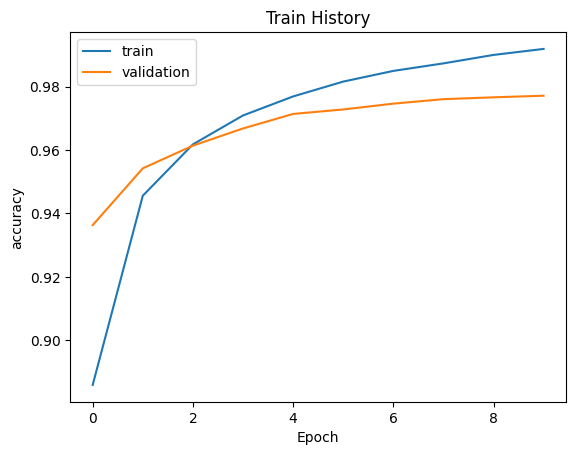

In [17]:
show_train_history(train_history,'accuracy','val_accuracy')

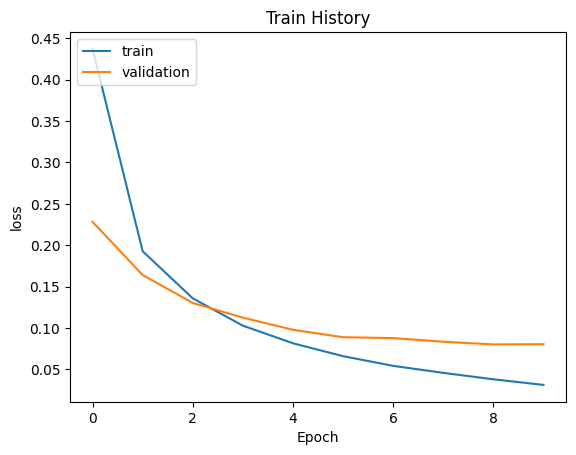

In [18]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [19]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0804

accuracy= 0.9776999950408936


# 進行預測

In [20]:
prediction=model.predict(x_Test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
# 10000個預測結果：二維陣列(10000, 10)，每一個預測結果:10個阿拉伯數字可能的機率
prediction.shape

(10000, 10)

In [22]:
# 第666號測試資料預測結果，數字7機率最高
prediction[666]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.99999994, 0.        , 0.        ],
      dtype=float32)

In [23]:
# 將機率最高的阿拉伯數字(7)找出來，作為預測結果(標籤)
predicted_lable = np.argmax(prediction[666])
predicted_lable

np.int64(7)

神經網路預測是： 7
實際是： 7


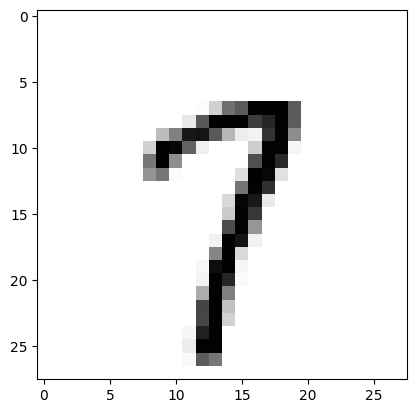

In [24]:
import matplotlib.pyplot as plt

print('神經網路預測是：', predicted_lable)
print('實際是：', y_test_label[666])
plt.imshow(x_Test[666].reshape(28,28), cmap='Greys');  # 測試圖片需reshape為原來28x28

In [25]:
# 一次呈現數張測試資料(圖片)、預測結果與真實結果，最多25張，預設10張
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=", predict="+str(np.argmax(prediction[idx]))

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

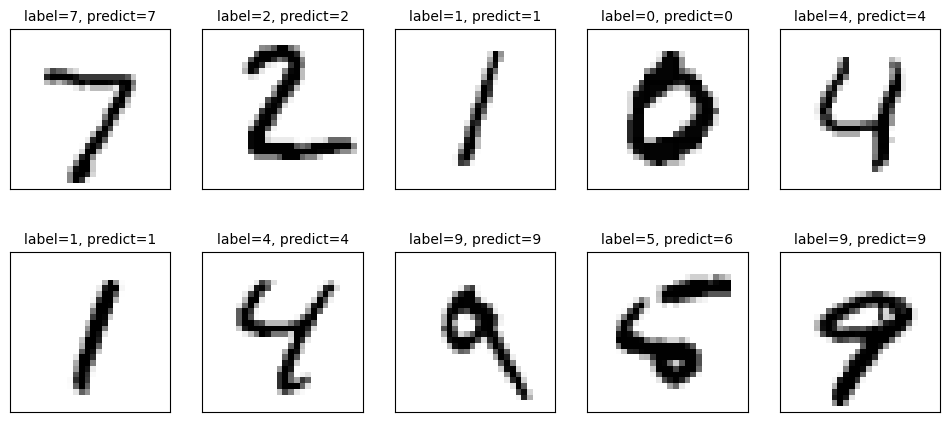

In [26]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix (混淆矩陣)
*   預測結果與真實結果相同或不同的情形


In [27]:
import pandas as pd
# 將10000個預測結果一一轉換為
predicted_labels = np.argmax(prediction, axis=1)

# Now use predicted_labels in crosstab
pd.crosstab(y_test_label, predicted_labels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,964,0,3,1,3,1,2,1,2,3
1,0,1126,4,0,0,1,2,0,2,0
2,1,1,1016,2,0,0,2,7,3,0
3,0,0,5,992,0,4,0,4,3,2
4,0,0,2,1,949,0,6,4,2,18
5,2,0,0,9,1,867,6,1,5,1
6,4,2,1,1,4,3,941,0,2,0
7,0,5,10,2,0,0,0,1004,0,7
8,3,0,4,8,3,2,3,5,945,1


In [28]:
# 每一筆測試資料的真實結果標籤(label)與預測結果標籤(predict)的表格(df)

df = pd.DataFrame({'label': y_test_label, 'predict': predicted_labels})
df[:10] # 表格前10筆測試資料

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [29]:
df[(df.label==5)&(df.predict==3)]  # 真實標籤為5，卻預測為3

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2810,5,3
3902,5,3
4355,5,3
5937,5,3
5972,5,3


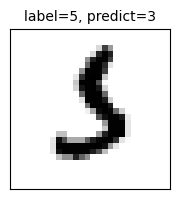

In [30]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

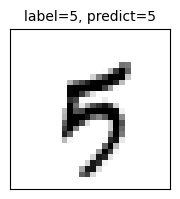

In [31]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)